<a href="https://colab.research.google.com/github/channingpitts/assignment3/blob/main/assignment_knn_and_kmc_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [3]:
! git clone https://www.github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 7.28 MiB | 9.02 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [3]:
df = pd.read_csv('/content/knn/data/car_data.csv')
print(df.head())
df.shape

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0


(1000, 5)

In [4]:
df['Gender'].describe()

count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object

In [5]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


There are not any missing values

In [6]:
# 2 dummy variable
df['gender'] = 0
df.loc[df['Gender'] == 'Female', 'gender'] = 1
df['gender'].value_counts()

1    516
0    484
Name: gender, dtype: int64

In [7]:
# 2 matrix X
vars = ['Age', 'AnnualSalary']
X = df.loc[:, vars]
y = df['Purchased']

In [8]:
# 3
def maxmin(x): # Maxmin normalization function
  x = (x-min(x))/(max(x)-min(x))
  return x

X = X.apply(maxmin)

X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [9]:
# 4 Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


[ 8 10 14]


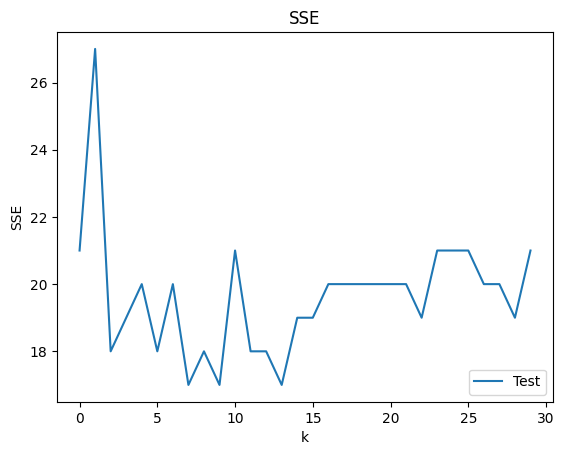

In [10]:
# 5 Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

# create model
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()


In [14]:
#6 running model for optimal number of neighbors
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,104,15
1,3,78


There are many cases that are predicted correctly with 0's going to 0's and 1's going to 1's. There are 15 times where 0 is classificed as a 1 and 3 times where a 1 is classified as a 0. The overall accuracy is 182/200=0.91 proportion of cases.

In [15]:
# 7 compute confusion matrices
from sklearn.model_selection import train_test_split
vars = ['Age', 'AnnualSalary', 'Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# training model
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender', axis=1), y_train)
y_hat = fitted_model.predict(X_test.drop('Gender', axis=1))

# predicted values by sex
y_hat_M = y_hat[X_test['Gender'] == 'Male']
y_hat_F = y_hat[X_test['Gender'] == 'Female']
y_M = y_test[X_test['Gender'] == 'Male']
y_F = y_test[X_test['Gender'] == 'Female']

In [14]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,58,9
1,5,33


In [16]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,45,7
1,15,28


For women, about 91/105=.8667 are correct. For men, 73/95=.7684 are correct. It seems like this model does a better job predicting what a female customer will do rather than a male customer. This difference is almost 10% more accurate.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [40]:
df2 = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')

In [41]:
# 1
list = ['Unnamed: 0', 'brand', 'model', 'title_status', 'color', 'vin', 'lot', 'state', 'country', 'condition']
cars = df2.drop(list, axis=1)
cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [42]:
cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [43]:
# 2
y = cars['price']
X = cars.loc[:, ['year', 'mileage']]

# maxmin function
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
print(X.head())
print(X.describe())

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


In [44]:
# 3
# Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


In [46]:
import seaborn as sns

In [52]:
from sklearn.neighbors import KNeighborsRegressor

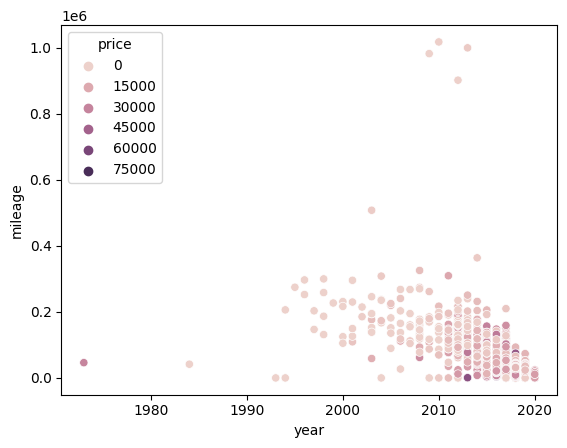

In [53]:
k=3
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
SSE[k] = np.sum( (y_test-y_hat)**2 )
this_plot = sns.scatterplot(data=cars,x='year',y='mileage',hue='price')


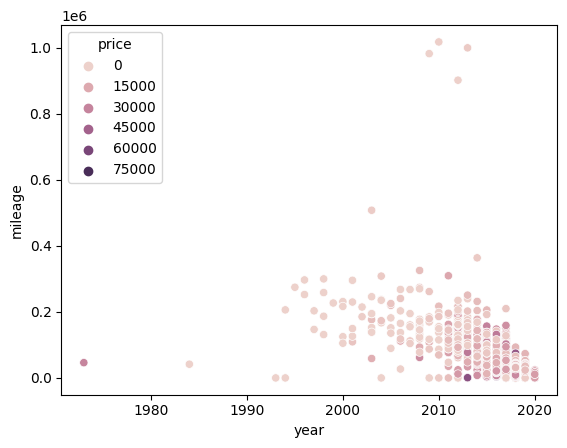

In [56]:
k=25
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
SSE[k] = np.sum( (y_test-y_hat)**2 )
this_plot = sns.scatterplot(data=cars,x='year',y='mileage',hue='price')


In [92]:
k=50
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
SSE[k] = np.sum( (y_test-y_hat)**2 )
this_plot = sns.scatterplot(data=cars,x='year',y='mileage',hue='price')


IndexError: ignored

In [22]:
from sklearn.cluster import KMeans

In [23]:
# A simple implementaton of kNN for regression:
k=3
def knn_hat(x_hat,cars,k):
    # Compute distances between x_hat and the data:
    squared_difference = (x_hat - cars.loc[:,['x1','x2']])**2
    distances = np.sum( squared_difference , axis = 1)
    # Find k smallest values in dist:
    neighbors = np.argsort(distances)[:k].tolist()
    # Find y values for the nearest neighbors:
    y_star = cars['y'].iloc[neighbors].tolist()
    # Average neighbor values to get prediction:
    y_hat = np.mean(y_star)
    # Return a dictionary of computed values of interest:
    return({'y_hat':y_hat, 'y_star':y_star, 'neighbors':neighbors})

[2]


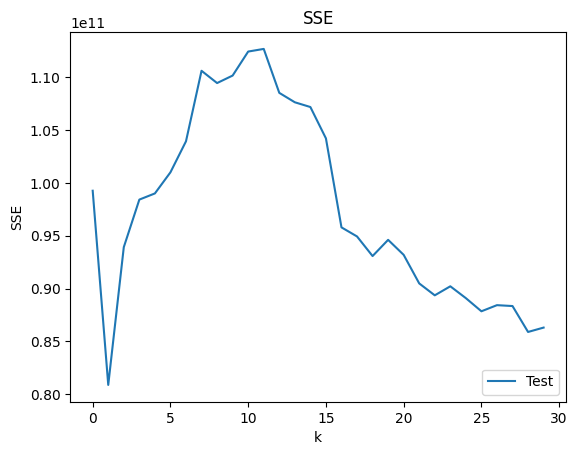

In [24]:
# determine optimal k
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

# create model
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [4]:
df = pd.read_csv('/content/knn/data/heart_failure_clinical_records_dataset.csv')

In [5]:
df.shape

(299, 13)

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# there does not seem to be any missings

In [7]:
# drop time
list = ['time']
heart = df.drop(list, axis=1)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [26]:
# correlation matrix
correlation = heart.corr()
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


Age, ejection fraction, serum creatine, and serum sodium are more correlated to death than the other variables

In [27]:
# create dummy variables
anaemia = 'anaemia'
diabetes = 'diabetes'
blood = 'high_blood_pressure'
sex = 'sex'
smoking = 'smoking'
var = 'DEATH_EVENT'

A higher propertion of the population dies when the variable takes the value 1 rather than 0 for anaemia and high blood pressure.

In [28]:
heart.loc[:,[var, anaemia]].groupby(anaemia).describe()

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0

In [29]:
heart.loc[:,[var,diabetes]].groupby(diabetes).describe()

DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0

In [30]:
heart.loc[:,[var,blood]].groupby(blood).describe()

DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0

In [31]:
heart.loc[:,[var,sex]].groupby(sex).describe()

DEATH_EVENT                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1         194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0

In [32]:
heart.loc[:,[var,smoking]].groupby(smoking).describe()

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
smoking                                                         
0             203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1              96.0  0.312500  0.465946  0.0  0.0  0.0  1.0  1.0

In [15]:
matrix = ['age', 'serum_creatinine', 'anaemia', 'high_blood_pressure']

In [16]:
X = heart[matrix]
y = heart['DEATH_EVENT']

In [33]:
# maxmin normalize
X = X.apply(maxmin)

In [19]:
# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


In [43]:
# 5 Determine the optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

# create model
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal number of neighbors: ", k_star)
print(SSE_min)

Optimal number of neighbors:  [2]
19.0


OK, do steps 5 through 7 again, but use all of the variables (except time). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [39]:
# use all variables
X_all = heart.drop(columns=['DEATH_EVENT'])
y = heart['DEATH_EVENT']

In [40]:
# maxmin normalize
X = X_all.apply(maxmin)

In [41]:
# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X_all,y,test_size=.2,random_state=100)


In [42]:
# Determine the optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

# create model
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal number of neighbors: ", k_star)
print(SSE_min)

Optimal number of neighbors:  [2]
19.0


The models had the same Sum of Squared errors so I think something is wonky, however, I would want to use variables that are actually more indicative of death rather than include all variables.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [79]:
import seaborn as sns

In [80]:
# 1 creating datasets
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

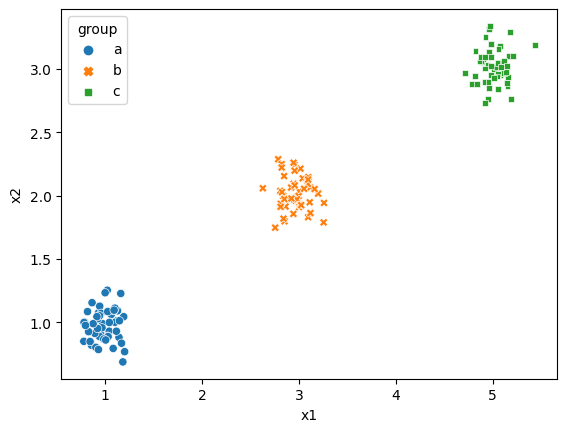

In [81]:
sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

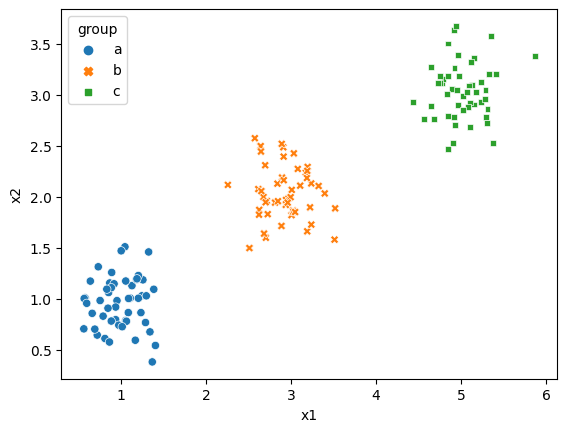

In [82]:
sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

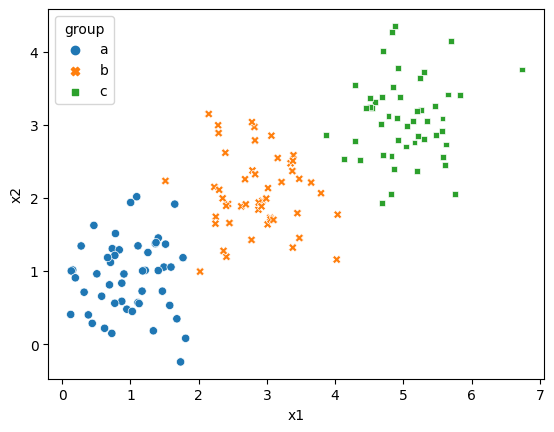

In [83]:
sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

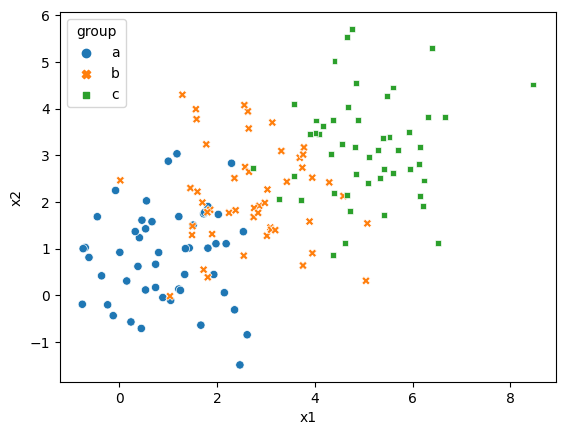

In [84]:
sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

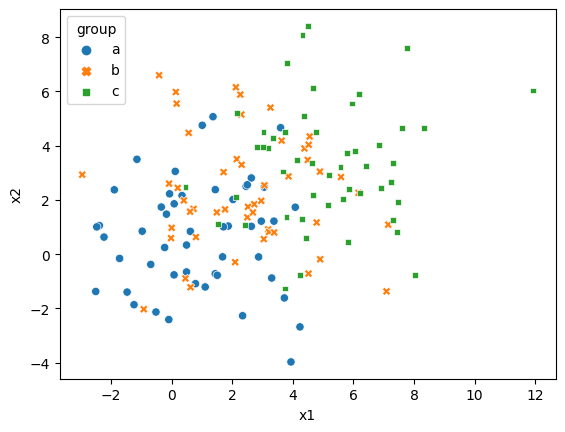

In [85]:
sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group', style='group')

The clusters go from dinstinctly grouped together to spread out as the noise goes up from 0.125 to 2.0. 0.5 is the last plot without overlapping points.

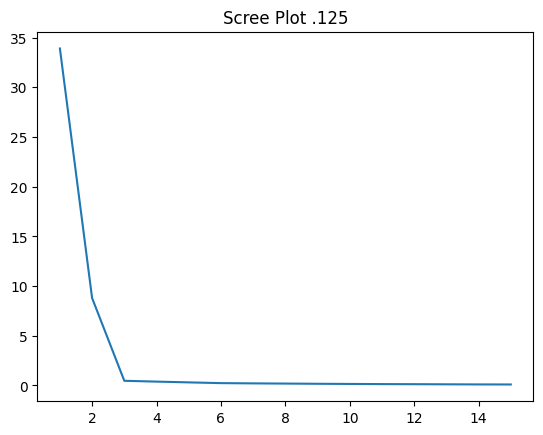

In [87]:
# 3 scree plots
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot .125') # Create scree plot

Elbow at k=3

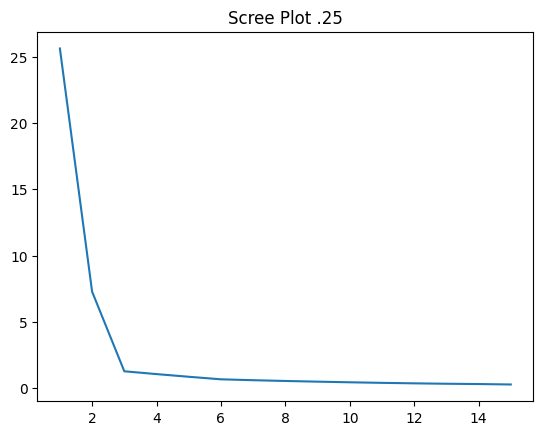

In [88]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot .25') # Create scree plot

Elbow at k=3

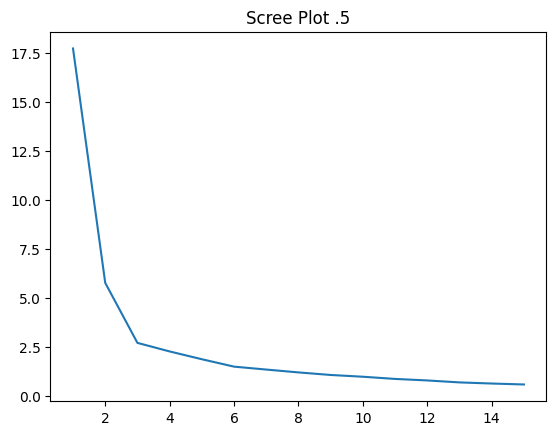

In [89]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot .5') # Create scree plot

Somewhat obvious that elbow at k=3

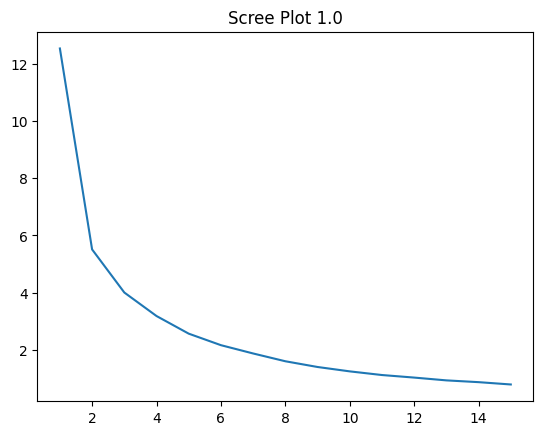

In [90]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 1.0') # Create scree plot

The "most" elbow-ish part at k=2.

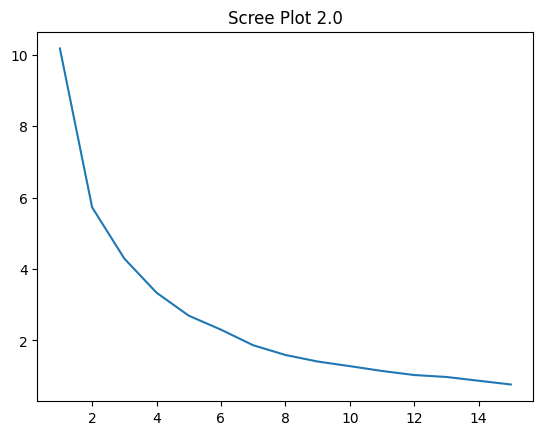

In [91]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 2.0') # Create scree plot

Not sure that there is an elbow here.

The ability to definitively select a k decreases as points begin to overlap.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

As the noise goes up, the groups spread out and become mixed in with the other groups. If there aren't any discrete clusters, the scree plot will be smooth and the elbow will not be distinct (1.0, 2.0). If the clusters are visually separated, the scree plot approach works and there is a visible elbow (.125, .25, .5).
